In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from scipy.stats import skew
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('Copper_Set-Copy1.xlsx - Result 1.csv')

C:\Users\santh\AppData\Local\Temp\ipykernel_1240\617594386.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Copper_Set-Copy1.xlsx - Result 1.csv')


In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
df.shape

(181673, 14)

In [6]:
df.id.values[0]

'EC06F063-9DF0-440C-8764-0B0C05A4F6AE'

In [7]:
df.id.value_counts

<bound method IndexOpsMixin.value_counts of 0         EC06F063-9DF0-440C-8764-0B0C05A4F6AE
1         4E5F4B3D-DDDF-499D-AFDE-A3227EC49425
2         E140FF1B-2407-4C02-A0DD-780A093B1158
3         F8D507A0-9C62-4EFE-831E-33E1DA53BB50
4         4E1C4E78-152B-430A-8094-ADD889C9D0AD
                          ...                 
181668    DE633116-D1DF-4846-982E-55EFC3658A76
181669    A48374B1-E6DB-45F2-889A-1F9C27C099EB
181670    91643238-5C7B-4237-9A5F-63AE3D35F320
181671    7AFFD323-01D9-4E15-B80D-7D1B03498FC8
181672    AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC
Name: id, Length: 181673, dtype: object>

In [8]:
df.item_date.value_counts

<bound method IndexOpsMixin.value_counts of 0         20210401.0
1         20210401.0
2         20210401.0
3         20210401.0
4         20210401.0
             ...    
181668    20200702.0
181669    20200702.0
181670    20200702.0
181671    20200702.0
181672    20200702.0
Name: item_date, Length: 181673, dtype: float64>

In [9]:
df.item_date.values[0]

20210401.0

In [10]:
df.item_date.isnull().sum()

1

In [11]:
df.item_date.fillna(df.item_date.mode()[0],inplace=True)

In [12]:
df['item_date']=pd.to_datetime(df['item_date'],format="%Y-%m-%d",errors="coerce").dt.date

In [13]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [14]:
df['quantity tons'].value_counts()

54.15113862    1
75.11072642    1
32.43164392    1
31.92534499    1
132.3113848    1
              ..
13.86959008    1
2.738535634    1
233.2640131    1
11.94017945    1
406.6865384    1
Name: quantity tons, Length: 181673, dtype: int64

In [15]:
df['quantity tons'].values[0]

54.15113862

In [16]:
df['quantity tons'].dtype

dtype('O')

In [17]:
df['quantity tons']=pd.to_numeric(df['quantity tons'],errors='coerce')

In [18]:
df['quantity tons'].dtype

dtype('float64')

In [19]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [20]:
df.customer.values[0]

30156308.0

In [21]:
df.customer.value_counts()

30157111.0    4988
30161088.0    3733
30201846.0    3152
30165529.0    2728
30202938.0    2570
              ... 
30271383.0       1
30356502.0       1
30357481.0       1
30156053.0       1
30271291.0       1
Name: customer, Length: 1169, dtype: int64

In [22]:
df.country.values[0]

28.0

In [23]:
df.country.value_counts()

78.0     32084
26.0     27516
25.0     23362
27.0     21511
32.0     18658
28.0     15824
84.0     12776
77.0      9714
30.0      8702
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64

In [24]:
df.status.values[0]

'Won'

In [25]:
df.status.value_counts()

Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [26]:
df['item type'].values[0]

'W'

In [27]:
df['item type'].value_counts()

W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64

In [28]:
df.application.values[0]

10.0

In [29]:
df.application.value_counts()

10.0    77544
41.0    46261
15.0    20772
59.0     8927
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       286
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      102
2.0        34
Name: application, dtype: int64

In [30]:
df['thickness'].values[0]

2.0

In [31]:
df['thickness'].value_counts()

2.00     13468
3.00     13207
0.50     12247
1.50     11731
1.00      9474
         ...  
7.06         1
9.39         1
15.66        1
2.28         1
15.60        1
Name: thickness, Length: 594, dtype: int64

In [32]:
df.width.values[0]

1500.0

In [33]:
df.width.value_counts()

1250.0    39149
1500.0    32681
1000.0    12271
2000.0     7613
1220.0     4785
          ...  
881.0         1
656.0         1
406.0         1
234.0         1
1786.0        1
Name: width, Length: 1386, dtype: int64

In [34]:
df['material_ref'].values[0]

'DEQ1 S460MC'

In [35]:
df['material_ref'].value_counts()

DX51D+Z                                     922
G9010                                       856
DC01 RED.FLAT KUCHNIA EKO 2.2               777
DC01                                        725
G9006                                       671
                                           ... 
0000000000000000000000000000000003050080      1
0000000000000000000000000000000004001568      1
0000000000000000000000000000000003016460      1
0000000000000000000000000000000003016459      1
202006170005.IO.1.1                           1
Name: material_ref, Length: 16563, dtype: int64

In [36]:
zero_threshold=10
df['material_ref']=np.where(df['material_ref'].apply(lambda x: str(x).count('0'))>=zero_threshold,np.nan,df['material_ref'])

In [37]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [38]:
df['material_ref'].value_counts()

DX51D+Z                          922
G9010                            856
DC01 RED.FLAT KUCHNIA EKO 2.2    777
DC01                             725
G9006                            671
                                ... 
DX51D+ZM310 2X1250                 1
S220GD 1.5X1250                    1
S220GD 1X1000                      1
S220GD 1.25X1500                   1
202006170005.IO.1.1                1
Name: material_ref, Length: 11352, dtype: int64

In [39]:
df.shape

(181673, 14)

In [40]:
df['product_ref'].values[0]

1670798778

In [41]:
df['product_ref'].value_counts()

611993        45727
164141591     28785
640665        27375
1670798778    18916
628377        18574
1668701718    15284
640405         9715
1671863738     5162
1332077137     4561
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      257
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: product_ref, dtype: int64

In [42]:
df['delivery date'].values[0]

20210701.0

In [43]:
df['delivery date'].isnull().sum()

1

In [44]:
df['delivery date'].fillna(df['delivery date'].mode()[0],inplace=True)

In [45]:
df['delivery date']=pd.to_datetime(df['delivery date'],format="%Y-%m-%d",errors="coerce").dt.date

In [46]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,1970-01-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01,577.00


In [47]:
df.selling_price.values[0]

854.0

In [48]:
df.selling_price.value_counts()

832.00    400
816.00    389
821.00    387
811.00    381
812.00    379
         ... 
788.99      1
819.06      1
830.45      1
696.47      1
615.81      1
Name: selling_price, Length: 9795, dtype: int64

In [49]:
df["selling_price"]=np.where(df['selling_price']<=0,np.nan,df['selling_price'])

In [50]:
df.drop_duplicates(subset="id",inplace=True)

In [51]:
df.shape

(181672, 14)

In [52]:
df.drop('id',axis=1,inplace=True)

In [53]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01,854.00
1,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,1970-01-01,1047.00
2,1970-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01,644.33
3,1970-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01,768.00
4,1970-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01,577.00


In [54]:
df.isnull().sum()

item_date             0
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     101710
product_ref           0
delivery date         0
selling_price         8
dtype: int64

In [55]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816710e+05,1.816710e+05,181644.000000,181648.000000,181671.000000,181672.000000,1.816720e+05,1.816640e+05
mean,5.874958e+03,3.051221e+07,44.893121,25.615625,2.564826,1295.288575,4.739705e+08,1.918132e+03
std,2.349088e+06,2.433388e+07,24.404245,17.754051,6.572339,261.631284,7.175112e+08,3.318029e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,1.000000e-01
25%,1.097022e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036499e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716084e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


<Axes: >

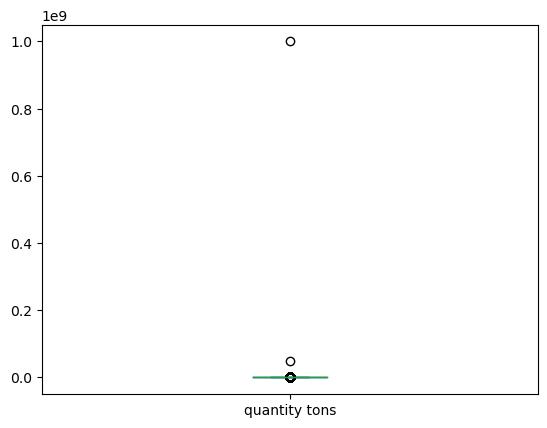

In [56]:
df['quantity tons'].plot(kind='box')

In [57]:
q1=df['quantity tons'].quantile(0.25)
q3=df['quantity tons'].quantile(0.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
print(lower)
print(upper)

-73.31570399
151.44676636999998


In [58]:
df['quantity tons']=df['quantity tons'].clip(0,151.446)

<Axes: >

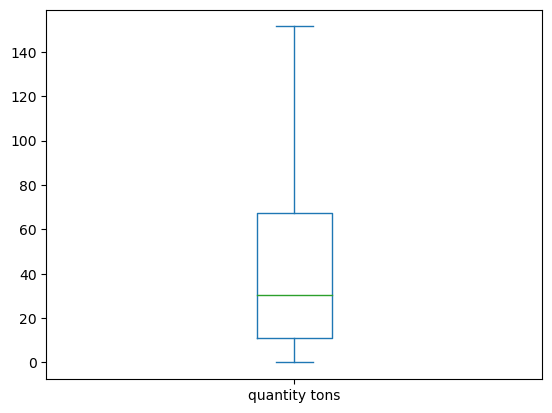

In [59]:
df['quantity tons'].plot(kind='box')

<Axes: >

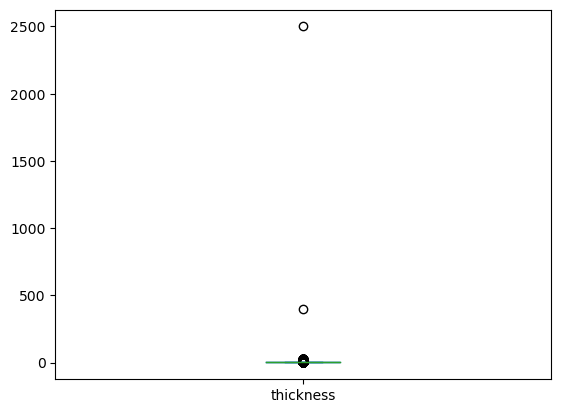

In [60]:
df.thickness.plot(kind="box")


In [61]:
q1=df['thickness'].quantile(0.25)
q3=df['thickness'].quantile(0.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
print(lower)
print(upper)

-2.75
6.449999999999999


In [62]:
df.thickness=df['thickness'].clip(0,6.449)

<Axes: >

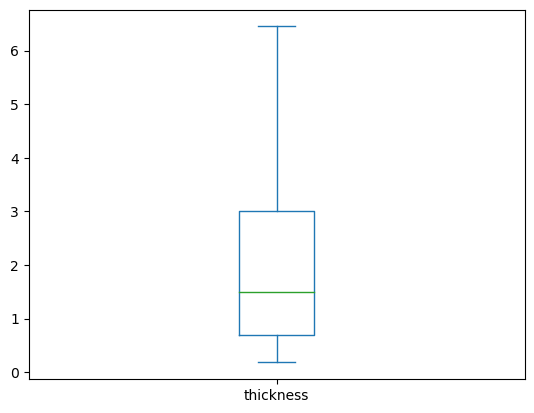

In [63]:
df.thickness.plot(kind='box')

<Axes: >

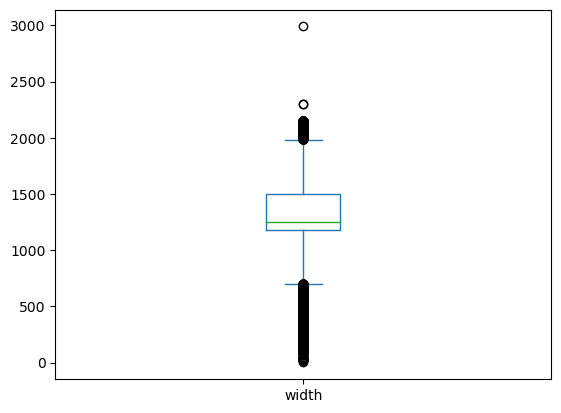

In [64]:
df.width.plot(kind='box')

In [65]:
q1=df['width'].quantile(0.25)
q3=df['width'].quantile(0.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
print(lower)
print(upper)

700.0
1980.0


In [66]:
df.width=df.width.clip(700,1980)

<Axes: >

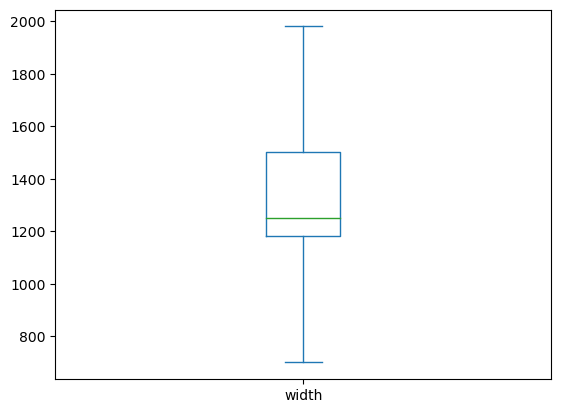

In [67]:
df.width.plot(kind='box')

## Missing values imputation

In [68]:
df.isnull().sum()

item_date             0
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     101710
product_ref           0
delivery date         0
selling_price         8
dtype: int64

In [69]:
df['quantity tons'].fillna(df['quantity tons'].mean(),inplace=True)

In [70]:
df['quantity tons'].isnull().sum()

0

In [71]:
df.customer.fillna(df.customer.median(),inplace=True)

In [72]:
df.customer.isnull().sum()

0

In [73]:
df.country.value_counts()

78.0     32084
26.0     27516
25.0     23362
27.0     21510
32.0     18658
28.0     15824
84.0     12776
77.0      9714
30.0      8702
39.0      3731
79.0      2742
38.0      1712
40.0      1683
80.0       819
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64

In [74]:
df.country.fillna(df.country.mode()[0],inplace=True)

In [75]:
df.country.isnull().sum()

0

In [76]:
df.application.value_counts()

10.0    77544
41.0    46261
15.0    20772
59.0     8926
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       286
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      102
2.0        34
Name: application, dtype: int64

In [77]:
df.application.fillna(df.application.mode()[0],inplace=True)

In [78]:
df.application.isnull().sum()

0

In [79]:
df.thickness.value_counts()

6.449    13959
2.000    13468
3.000    13207
0.500    12247
1.500    11731
         ...  
2.075        1
3.240        1
3.940        1
4.760        1
4.290        1
Name: thickness, Length: 443, dtype: int64

In [80]:
df.thickness.fillna(df.thickness.mean(),inplace=True)

In [81]:
df.thickness.isnull().sum()

0

In [82]:
(df['material_ref'].isnull().sum()/len(df))*100

55.98551235193096

In [83]:
#more than 50% of data value is null so i drop the column
df.drop('material_ref',axis=1,inplace=True)

In [84]:
np.log(1500.0)

7.313220387090301

In [85]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,1970-01-01,854.00
1,1970-01-01,151.446000,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1970-01-01,1047.00
2,1970-01-01,151.446000,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,1970-01-01,644.33
3,1970-01-01,151.446000,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,1970-01-01,768.00
4,1970-01-01,151.446000,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,1970-01-01,577.00


In [86]:
df['selling_price']=np.log(df['selling_price'])

In [87]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,181672.000000,1.816720e+05,181672.000000,181672.000000,181672.000000,181672.000000,1.816720e+05,181664.000000
mean,49.175455,3.051221e+07,44.898223,25.613562,2.245351,1297.047444,4.739705e+08,6.625888
std,47.993126,2.433382e+07,24.405825,17.753785,1.890541,248.961354,7.175112e+08,0.565404
min,0.000000,1.245800e+04,25.000000,2.000000,0.180000,700.000000,6.117280e+05,-2.302585
25%,10.970298,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.505784
50%,30.364996,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,6.699500
75%,67.160612,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,6.859615
max,151.446000,2.147484e+09,113.000000,99.000000,6.449000,1980.000000,1.722208e+09,18.420691


In [88]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,1970-01-01,6.749931
1,1970-01-01,151.446000,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1970-01-01,6.953684
2,1970-01-01,151.446000,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,1970-01-01,6.468211
3,1970-01-01,151.446000,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,1970-01-01,6.643790
4,1970-01-01,151.446000,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,1970-01-01,6.357842


C:\Users\santh\AppData\Local\Temp\ipykernel_1240\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

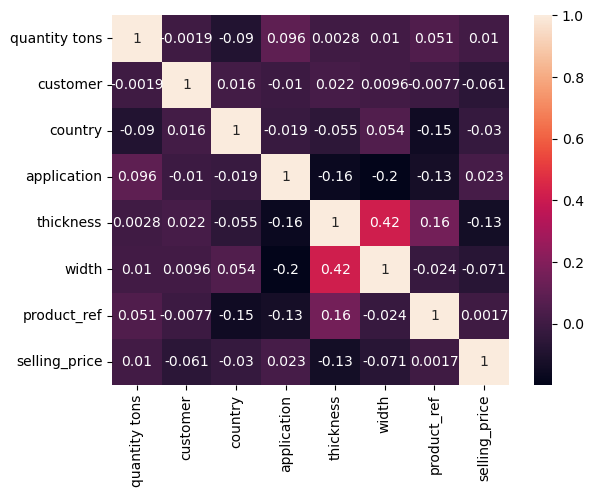

In [89]:
sns.heatmap(df.corr(),annot=True)

## Enode categorical data

In [90]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,1970-01-01,6.749931
1,1970-01-01,151.446000,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1970-01-01,6.953684
2,1970-01-01,151.446000,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,1970-01-01,6.468211
3,1970-01-01,151.446000,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,1970-01-01,6.643790
4,1970-01-01,151.446000,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,1970-01-01,6.357842


In [91]:
df.status.fillna(df.status.mode()[0],inplace=True)

In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['labeled_status']=le.fit_transform(df['status'])

In [93]:
le1=LabelEncoder()
df['labeled_item type']=le1.fit_transform(df['item type'])

In [94]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,labeled_status,labeled_item type
0,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,1970-01-01,6.749931,7,5
1,1970-01-01,151.446000,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1970-01-01,6.953684,7,5
2,1970-01-01,151.446000,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,1970-01-01,6.468211,7,6
3,1970-01-01,151.446000,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,1970-01-01,6.643790,7,3
4,1970-01-01,151.446000,30211560.0,28.0,Won,W,10.0,4.00,1980.0,640665,1970-01-01,6.357842,7,5


In [95]:
df.drop("status",axis=1,inplace=True)
df.drop("item type",axis=1,inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181672 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   item_date          181672 non-null  object 
 1   quantity tons      181672 non-null  float64
 2   customer           181672 non-null  float64
 3   country            181672 non-null  float64
 4   application        181672 non-null  float64
 5   thickness          181672 non-null  float64
 6   width              181672 non-null  float64
 7   product_ref        181672 non-null  int64  
 8   delivery date      181672 non-null  object 
 9   selling_price      181664 non-null  float64
 10  labeled_status     181672 non-null  int32  
 11  labeled_item type  181672 non-null  int32  
dtypes: float64(7), int32(2), int64(1), object(2)
memory usage: 16.6+ MB


In [97]:
df.head()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,labeled_status,labeled_item type
0,1970-01-01,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,1970-01-01,6.749931,7,5
1,1970-01-01,151.446000,30202938.0,25.0,41.0,0.80,1210.0,1668701718,1970-01-01,6.953684,7,5
2,1970-01-01,151.446000,30153963.0,30.0,28.0,0.38,952.0,628377,1970-01-01,6.468211,7,6
3,1970-01-01,151.446000,30349574.0,32.0,59.0,2.30,1317.0,1668701718,1970-01-01,6.643790,7,3
4,1970-01-01,151.446000,30211560.0,28.0,10.0,4.00,1980.0,640665,1970-01-01,6.357842,7,5


In [98]:
df=df.dropna()

In [99]:
X=df.drop(columns=["selling_price","item_date","delivery date"],axis=1)
y=df['selling_price']

In [100]:
X.head()

,quantity tons,customer,country,application,thickness,width,product_ref,labeled_status,labeled_item type
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,7,5
1,151.446000,30202938.0,25.0,41.0,0.80,1210.0,1668701718,7,5
2,151.446000,30153963.0,30.0,28.0,0.38,952.0,628377,7,6
3,151.446000,30349574.0,32.0,59.0,2.30,1317.0,1668701718,7,3
4,151.446000,30211560.0,28.0,10.0,4.00,1980.0,640665,7,5


In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [102]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [103]:
#from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
#dt=DecisionTreeRegressor(max_depth=16)
#dt.fit(X_train,y_train)
#y_pred=dt.predict(X_test)
#r2_score(y_test,y_pred)

In [104]:
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#from sklearn.metrics import make_scorer


#for depth in [14,15,16,17,18]:
 # dt=DecisionTreeRegressor(max_depth=depth)
  #dt.fit(X_train,y_train)
 # trainAccuracy=r2_score(y_train,dt.predict(X_train))
 # dt=DecisionTreeRegressor(max_depth=depth)
 # valAccuracy=cross_val_score(dt,X_train,y_train,cv=10,scoring=make_scorer(r2_score))
 # print("depth",depth,"train score",trainAccuracy,"val score",np.mean(valAccuracy))


In [105]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,max_depth=22,max_features="sqrt")
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
r2_score(y_test,y_pred)

0.9306266769406821

In [106]:
X.head()

,quantity tons,customer,country,application,thickness,width,product_ref,labeled_status,labeled_item type
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,7,5
1,151.446000,30202938.0,25.0,41.0,0.80,1210.0,1668701718,7,5
2,151.446000,30153963.0,30.0,28.0,0.38,952.0,628377,7,6
3,151.446000,30349574.0,32.0,59.0,2.30,1317.0,1668701718,7,3
4,151.446000,30211560.0,28.0,10.0,4.00,1980.0,640665,7,5


In [107]:
import warnings
warnings.filterwarnings("ignore")

In [108]:
#new_sample=np.array([[54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,"Won","W"]])
#new_sample_le=le.transform(new_sample[:,[7]])
#new_sample_le1=le1.transform(new_sample[:,[8]])
#new_sample_le=new_sample_le.reshape(-1,1)
#new_sample_le1=new_sample_le1.reshape(-1,1)
#new_sample_sc=np.concatenate((new_sample[:,[0,1,2,3,4,5,6]],new_sample_le,new_sample_le1),axis=1)
#new_sample1=sc.transform(new_sample_sc)
#new_pred=rf.predict(new_sample1)[0]
#print("price:",round(np.exp(new_pred)))


In [109]:
#pd.DataFrame(rf.feature_importances_,index=X.columns).sort_values(by=0,ascending=False)

In [110]:
#pd.DataFrame({"y true":np.exp(y_test),"y_pred":np.exp(y_pred)})

In [111]:
import pickle
with open("model.pkl","wb") as file:
    pickle.dump(rf,file)
#with open("scaler.pkl","wb") as file:
  #pickle.dump(sc,file)
#with open("labenc.pkl","wb") as file:
 # pickle.dump(le,file)
#with open("labenc1.pkl","wb") as file:
 # pickle.dump(le1,file)

In [112]:
#!pip install streamlit -q

In [113]:
#!pip install streamlit_option_menu

In [114]:
#X.head()

In [115]:
#

In [116]:
#@!npm install localtunnel

In [117]:
#!streamlit run app.py &>/content/log.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com#